In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import plotly.express as px

df = pd.read_csv('Admission_Predict.csv')

## Graduate Admission 2

**Note:** Searching for a dataset where I can predict some data with the help of linear gradient, I came across this dataset and find it interesting.

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

- `GRE Scores` ( out of 340 )
- `TOEFL Scores` ( out of 120 )
- `University Rating` ( out of 5 )
- `Statement of Purpose and Letter of Recommendation Strength` ( out of 5 )
- `Undergraduate GPA` ( out of 10 )
- `Research Experience` ( either 0 or 1 )
- `Chance of Admit` ( ranging from 0 to 1 )



## Data Exploration

In [207]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Note:** This dataset contains information crucial for Masters Program applications. `SOP` represents the Statement Of Purpose, while `LOR` stands for Letter of Recommendation Strength. Additionally, `Research` indicates the Research Experience of the applicants, where `1` signifies `yes` and `0` indicates `no experience`.

In [208]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None


**Note:** Notably, the dataset lacks empty cells, and all values are represented by either int64 or float64.

In [209]:
print(df.columns)

numerical_df = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR " ,"CGPA","Chance of Admit "]] 
categorical_df = df[["Research"]]


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


**Note**: There is only 1 categorical variable which is `Research`.

In [210]:

numerical_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,0.970000


**Note:** Looking at the results above we can see from the `count` column that we have 400 instances.

## Correlations

1. The first thing I want to check is whether the CGPA has impact on the TOEFL Score.

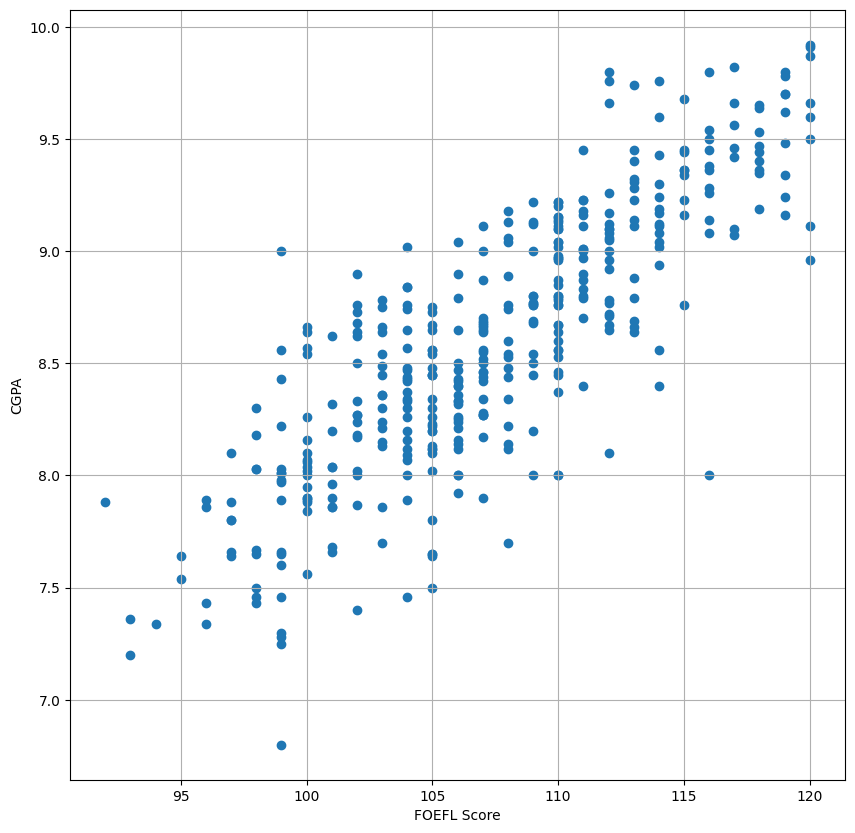

In [211]:
plt.scatter(df['TOEFL Score'], df['CGPA'])

plt.xlabel("FOEFL Score")
plt.ylabel("CGPA")

plt.grid()

**Note:** We can observe a correlation between the TOEFL Score and CGPA. This suggests that students with higher CGPA scores tend to perform better in the TOEFL. However, it's important to note that a high CGPA score does not guarantee a high TOEFL Score, as evidenced by outliers. Notable instances include a CGPA of around 6.5 with a TOEFL Score around 99, a CGPA of around 7.9 with a TOEFL Score around 91, a CGPA of around 9.0 with a TOEFL Score around 99, and a CGPA of around 8.0 with a TOEFL Score around 116.

2. The second thing I was excited to check is whether research experience guarantees positive admission to the master's program. 

Text(0, 0.5, 'Chance of Admit')

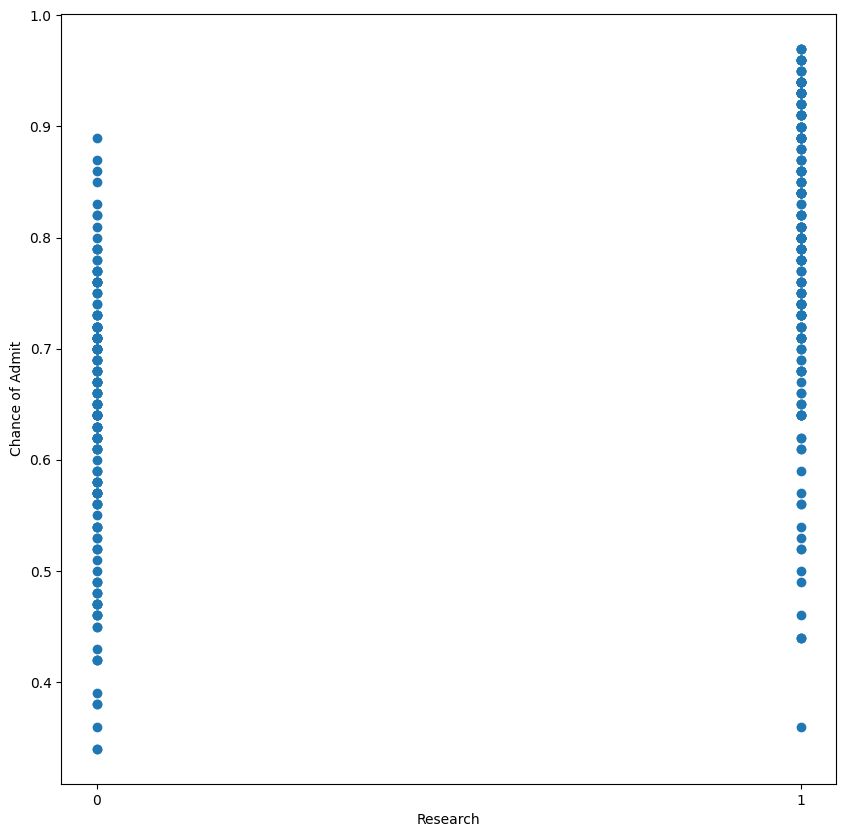

In [189]:
plt.scatter(df['Research'], df['Chance of Admit '])
plt.xticks(ticks=[0, 1])
plt.xlabel("Research")
plt.ylabel("Chance of Admit")

**Note:** We can see that it is higher chance to have a positive admission when the person has some research experience.

3. The next aspect that intrigued me was whether it is more challenging to gain admission to the university with a high rating.

Text(0, 0.5, 'Chance of Admit')

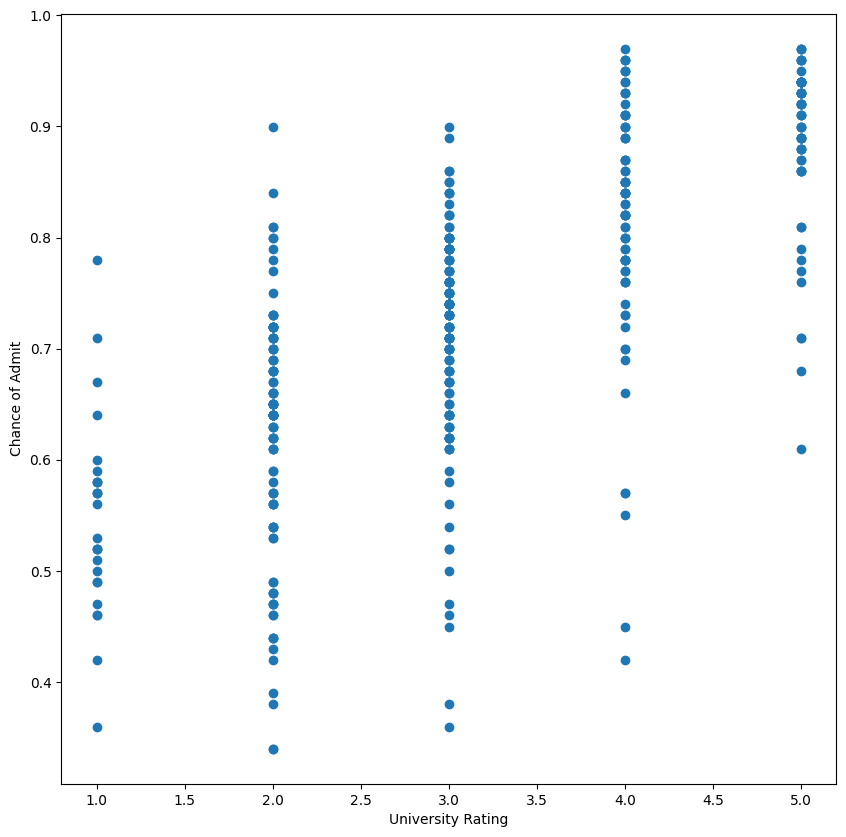

In [190]:
plt.scatter(df['University Rating'], df['Chance of Admit '])

plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")

**Note:** And we can observe that it is much harder to get to the high ranked university, as it is expected.

I was skeptical about this plot, so I created a boxplot to visualize the median and identify any outliers.

Text(0, 0.5, 'Chance of Admit')

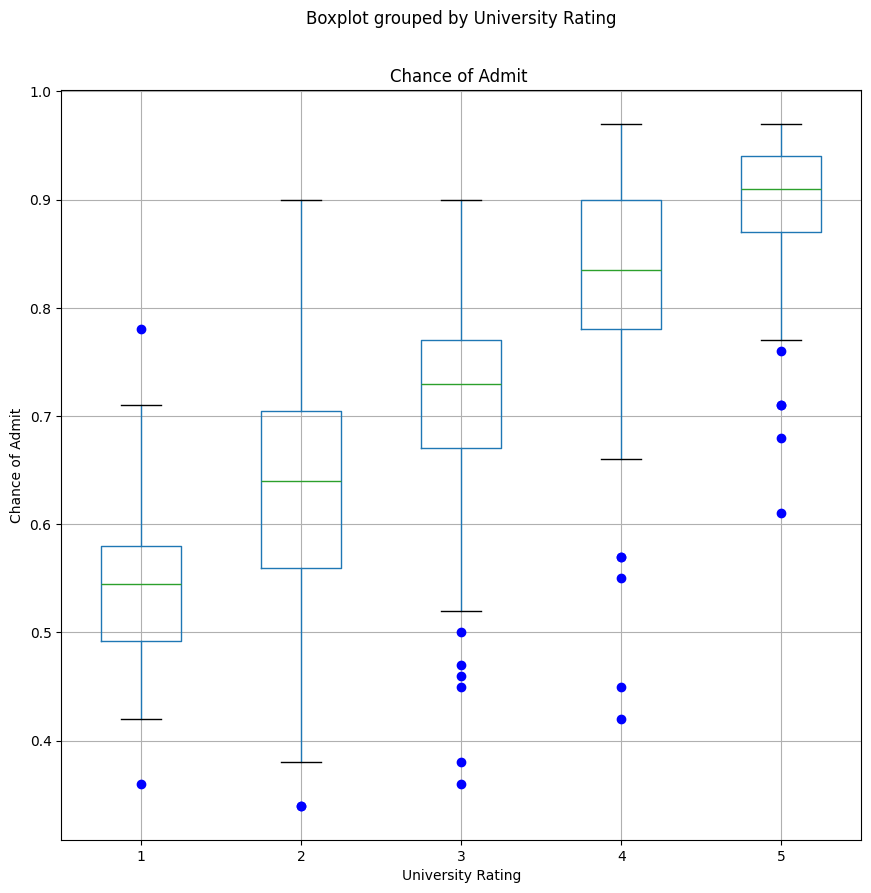

In [191]:

box_df = df[['University Rating', 'Chance of Admit ']]
flierprops = dict(marker='o', markerfacecolor='b', linestyle='none', markeredgecolor='b')
box_df.boxplot(by='University Rating', flierprops=flierprops)
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')

**Note:** There we can actually see looikng at the median and the outliers, that is it much harder to get to top universities.

4. I also wanted to determine the number of applicants with research experience.

In [192]:
fig=px.pie(df, values=df['Research'].value_counts().values,
           names=df['Research'].value_counts().index, title='Research')
fig.show()

## Data Preprocessing

**Note:** While analyzing the dataset, I noticed a column that serves no purpose in the data processing. So I have deleted it with the help of drop function and also checked the dataset for having missing values.

In [193]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Note:** To make the dataset more comfortable to work with I have changed names of values.

In [194]:
df=df.rename(columns = {'Chance of Admit ':'Chance_of_Admit'})
df=df.rename(columns = {'GRE Score':'GRE_Score'})
df=df.rename(columns = {'TOEFL Score':'TOEFL_Score'})
df=df.rename(columns = {'University Rating':'University_Rating'})
df=df.rename(columns = {'LOR ':'LOR'})


## Exercise 1
a) Create and train simple regression model of CGPA to Chance of Admit.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [195]:
#a)

X = df.CGPA.values.reshape(-1,1)[:1000]
y = df.Chance_of_Admit.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)
model = LinearRegression().fit(X_train, y_train)


**Note:** In this exercise, I'm employing linear regression and have divided the dataset into training and testing sets.

To achieve this, I'm utilizing the `train_test_split` function. I've allocated a test size of 20% of the entire dataset and defined a random state. The random state value maintains dataset consistency, producing the same dataset for a given integer value.

The `fit` method used in this exercise trains the model. It takes an array of features as parameters and an array representing the response to these features.

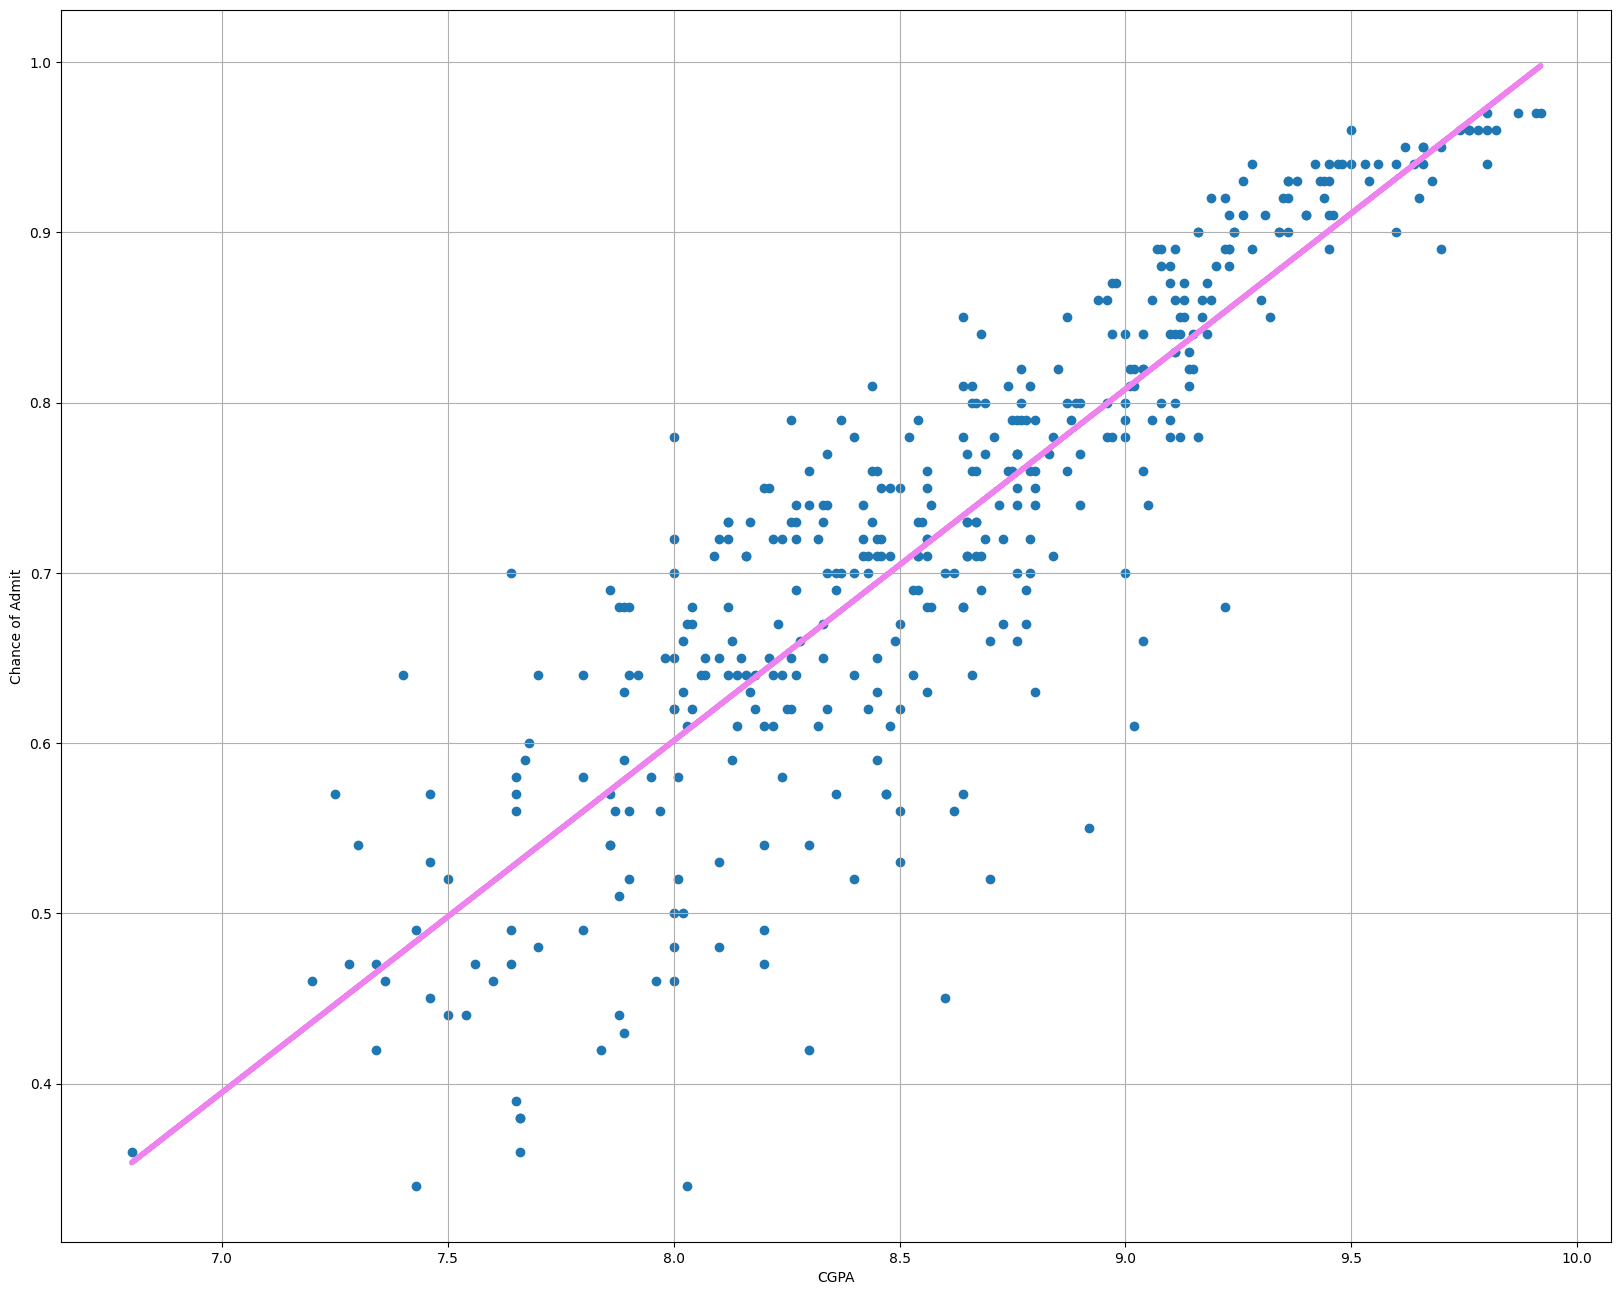

In [196]:

fig, ax = plt.subplots(figsize=(20, 16))

ax.set_ylabel('Chance of Admit')
ax.set_xlabel('CGPA')

ax.plot(X, (model.intercept_ + X * model.coef_), 'violet', linewidth=4)
ax.scatter(X, y)
ax.grid()

**Note:**

In the chart above, we observe a relatively weak correlation between the house CGPA and the Chance of Admit parameter initially. This might be attributed to the difficulty of accurately determining the chance of admission solely based on the CGPA score, especially when it is not high. However, it is evident that the better the CGPA, the higher the chance of admission.

Additionally, we are using a linear regression model, represented by the violet line fitted through the data. As per the sklearn documentation, this line is plotted to be as close as possible to all data points on average. However, due to the simplicity of the regression model, achieving a perfect fit to this dataset can be challenging.

In [197]:
ms = model.score(X_test, y_test)
mse = mean_squared_error(X_test, y_test)

print('Model score is:', ms)
print('Mean squared error is:', mse)

Model score is: 0.8130627385469225
Mean squared error is: 61.635491249999994


**Note:** To assess the quality of the model, I used the `mean_squared_error` method, which is a crucial metric for evaluating the performance of our predictive model. It quantifies the average squared difference between the predicted and actual target values within the dataset.

The `score` method is employed to determine the model's accuracy. As we can see, the model's score is 0.813, indicating that the model explains approximately 81.3% of the variance in the target variable.

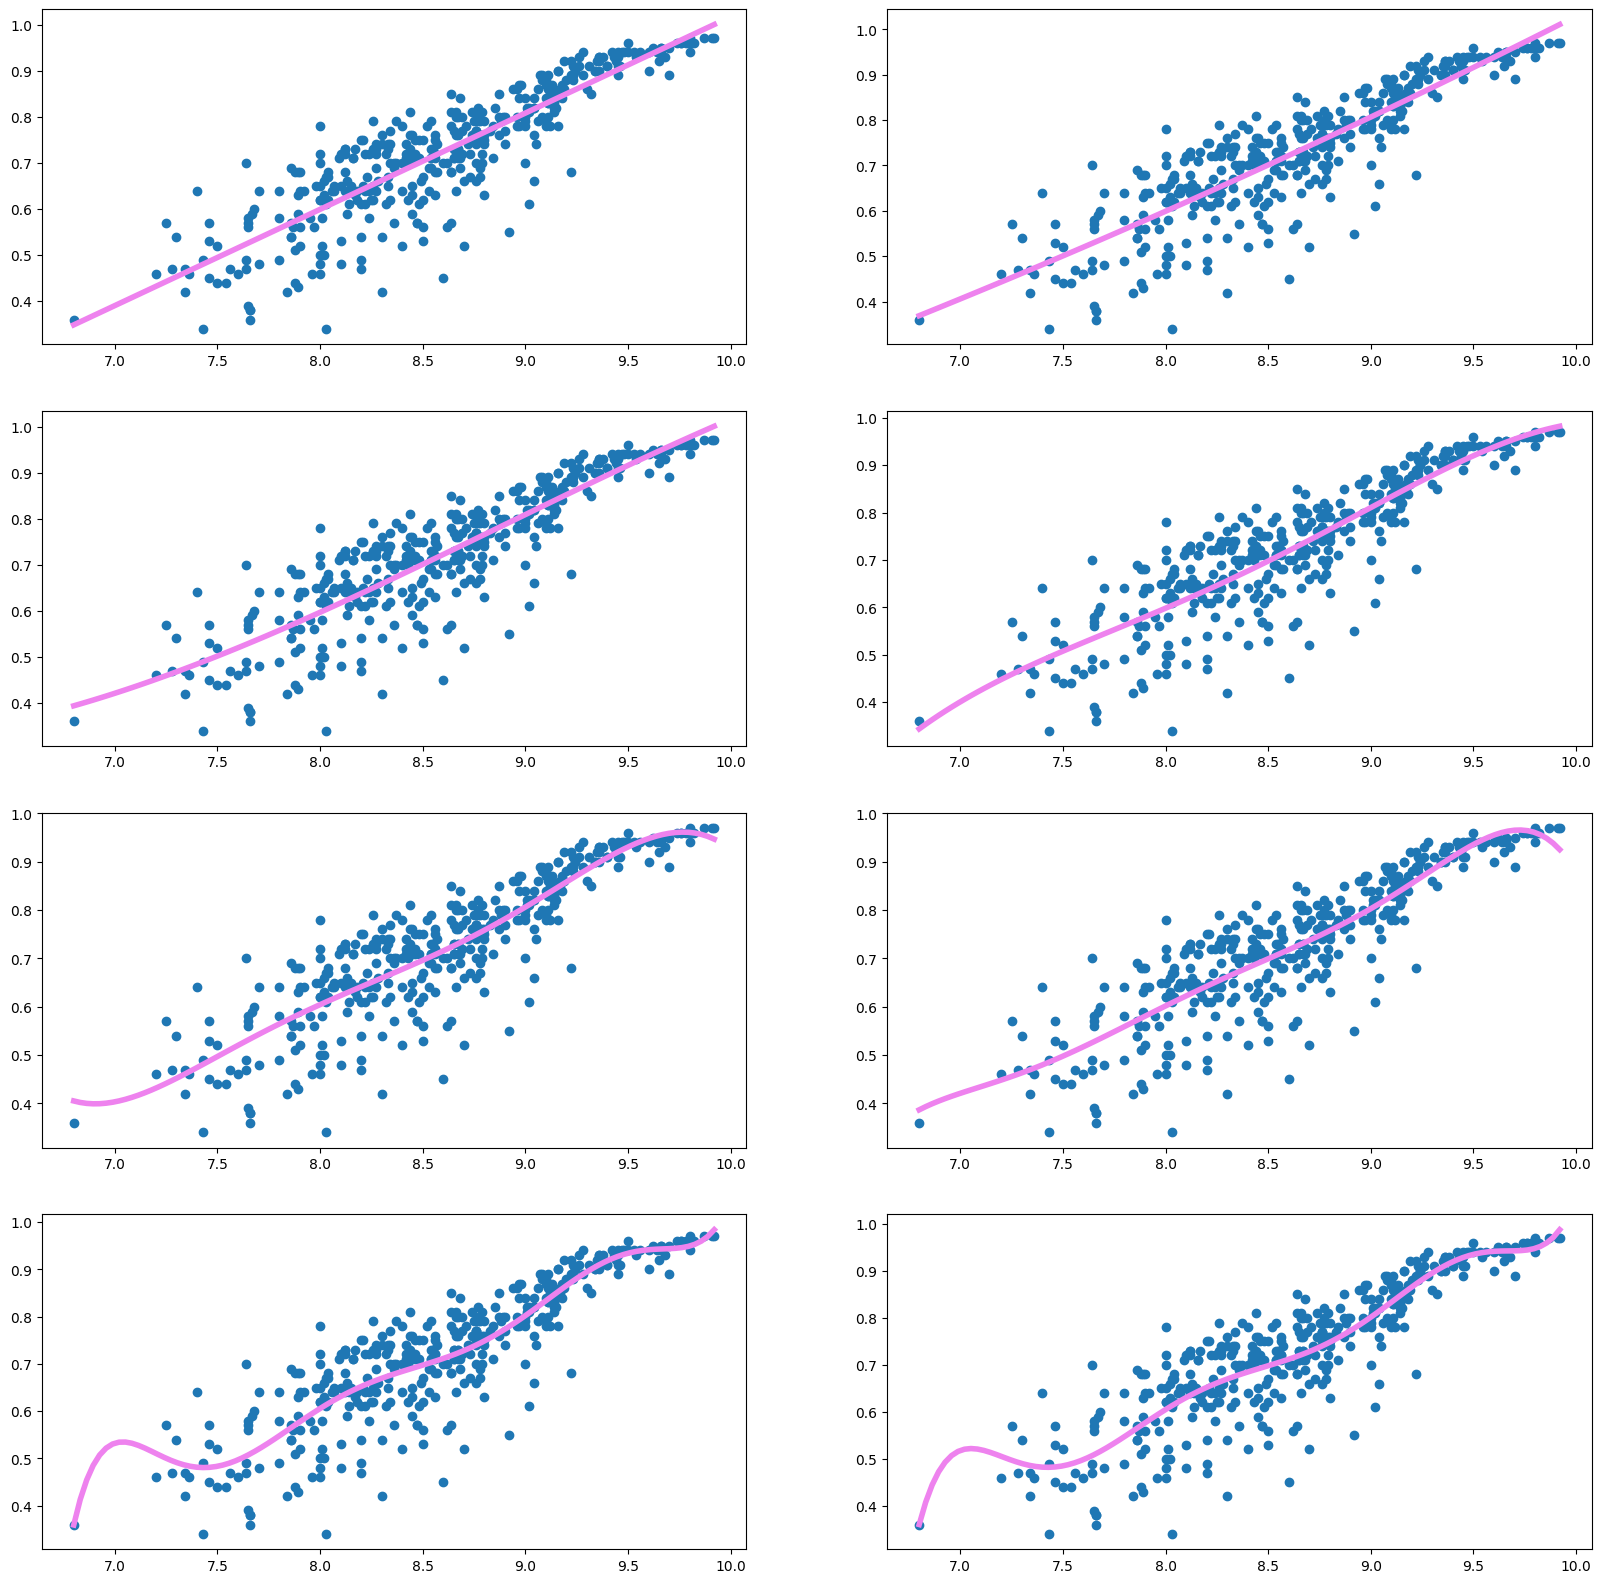

In [198]:
#c)
mean_array = []
fig, ax = plt.subplots(4, 2, figsize =(20, 20))

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    model.fit(X_order, y)
    
    X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    X_range_ordering = poly.transform(X_range)

    y_predict = model.predict(X_range_ordering)

    column_queueing = 0 if order % 2 == 1 else 1

    ax[(order - 1) // 2, column_queueing].scatter(X, y)
    ax[(order - 1) // 2, column_queueing].plot(X_range, y_predict, 'violet', linewidth=4)

    mean_array.append(mean_squared_error(y, model.predict(X_order)))


**Note:** In the chart above, we observe that as the polynomial order increases, the regression fits better to the training dataset. It's noticeable that as the polynomial order increases, the error becomes smaller. However, it's important to be cautious as higher polynomial orders can lead to worse predictions.

Increasing the polynomial order in a polynomial regression model can result in poorer predictions due to a overfitting. It occurs when a model becomes overly complex and starts fitting noise or random fluctuations in the training data rather than the underlying pattern or trend. This can result in poor generalization to new, unseen data.

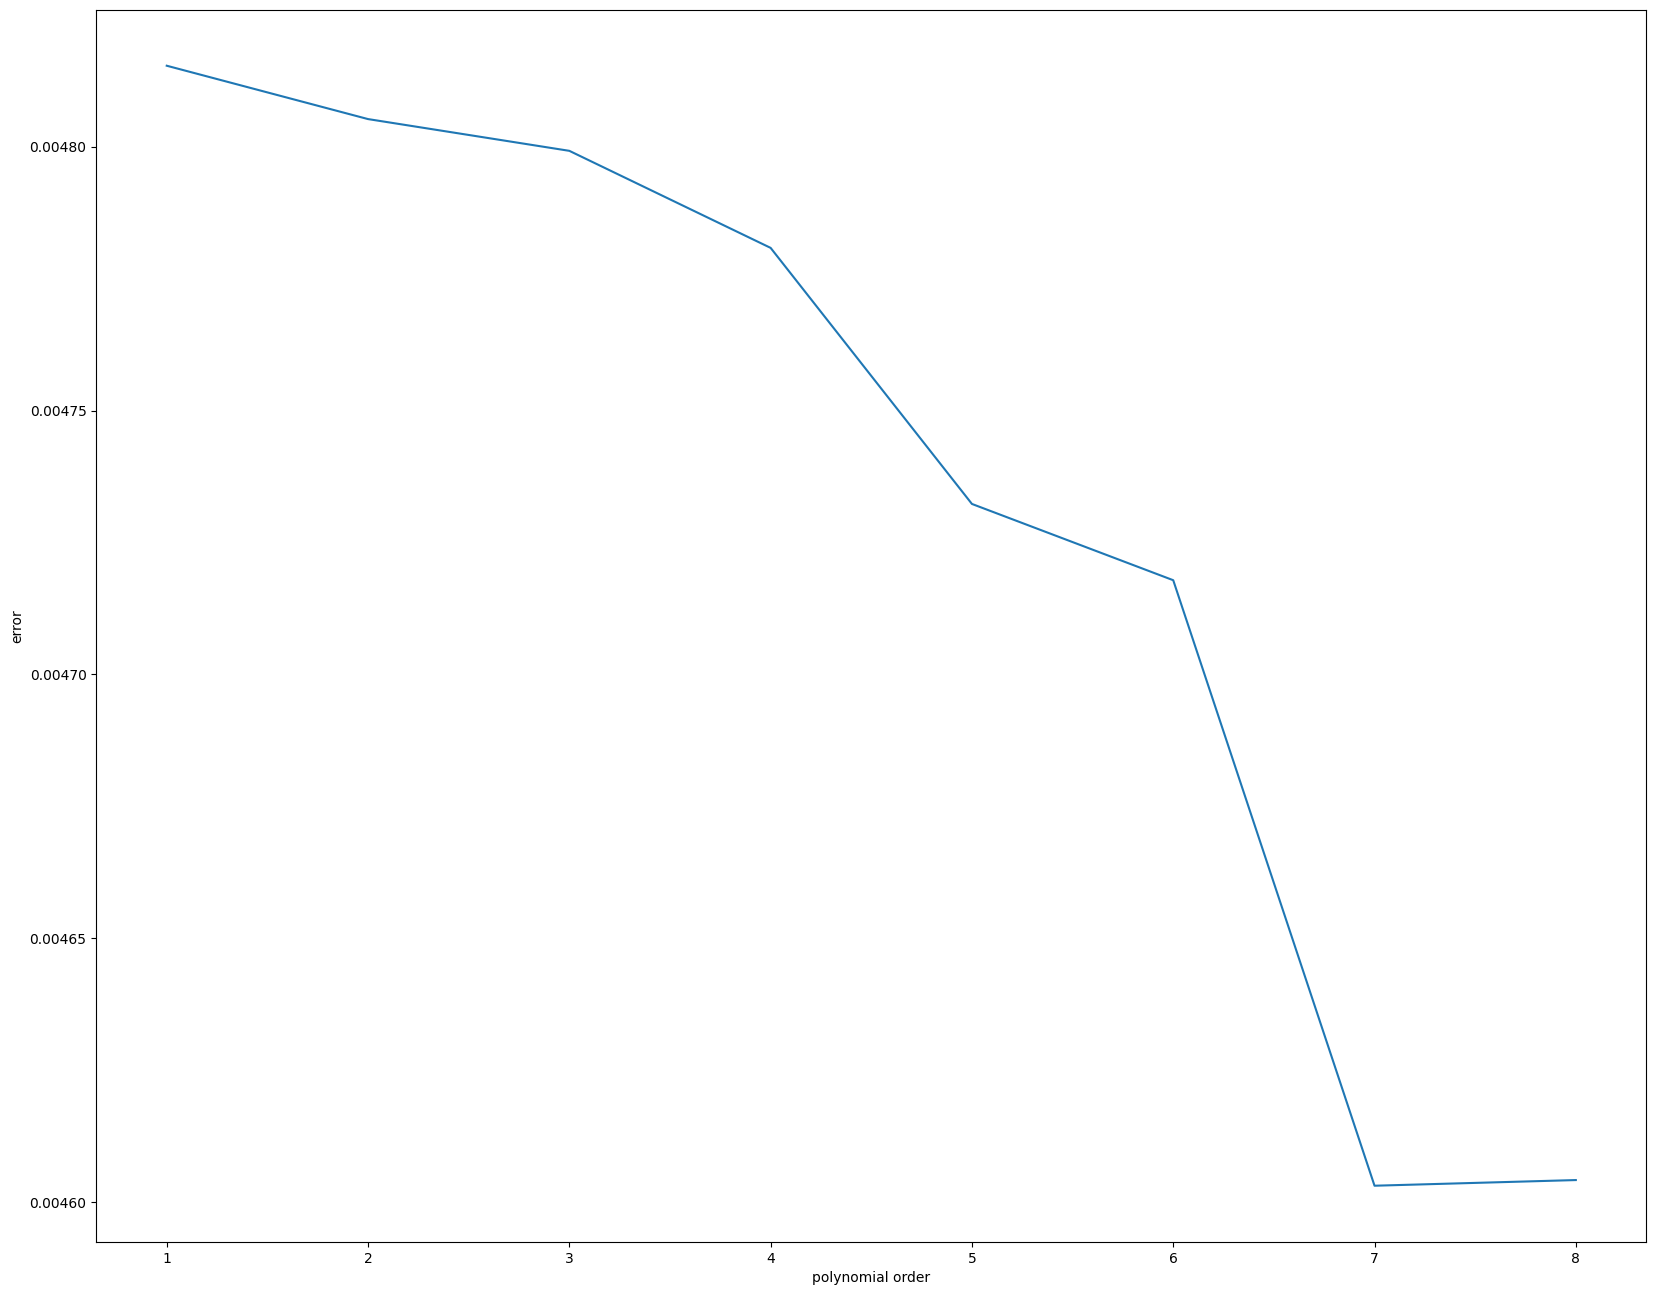

In [199]:
degree = list(range(1, 9))
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlabel('polynomial order')
ax.set_ylabel('error')
ax.plot(degree, mean_array)

**Note:** The chart above illustrates the relationship between the average error and the polynomial order. It confirms what I mentioned earlier. With higher polynomial orders, the model fits the data better, resulting in smaller errors. Nevertheless, it's important to be mindful with high polynomial orders. 

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

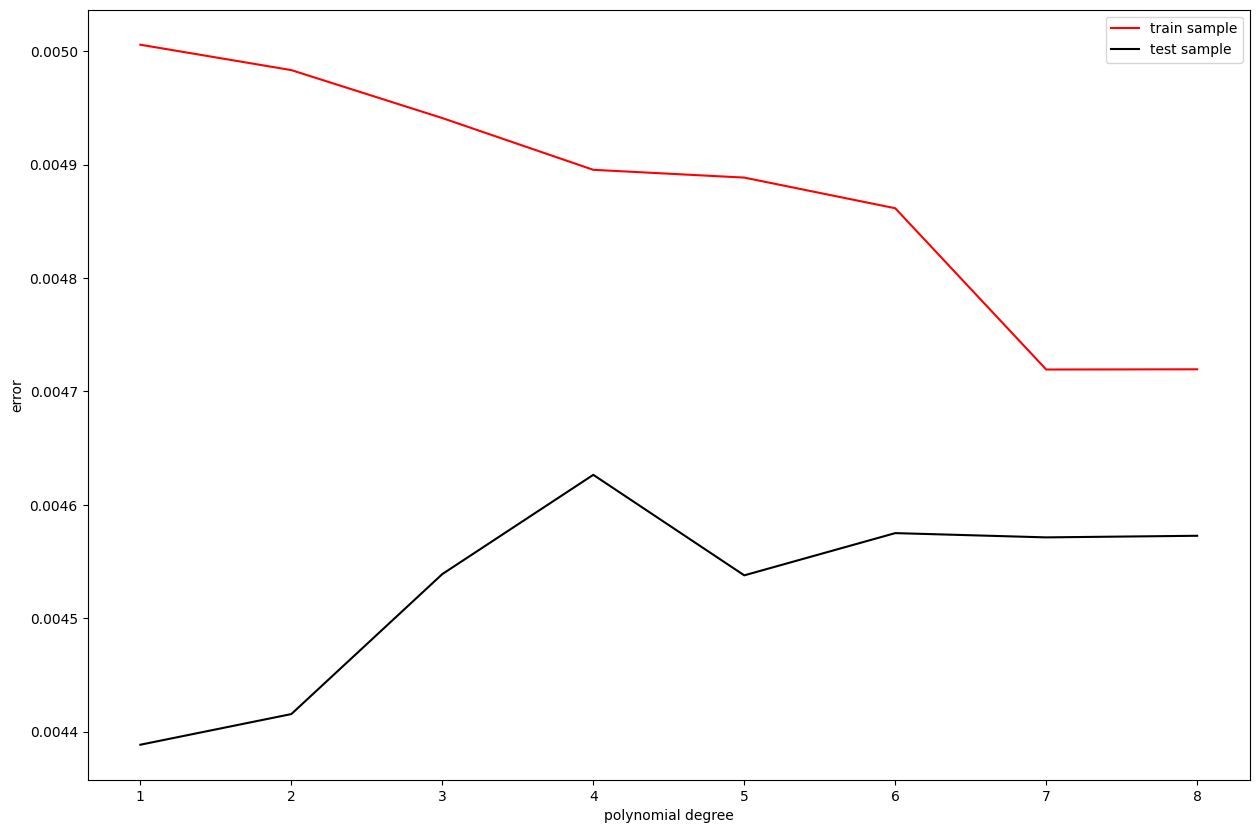

In [200]:
train_sample = []
test_sample = []



for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    model.fit(X_train, y_train)

    y_predict = model.predict(X_train)
    train_sample.append(mean_squared_error(y_train, y_predict))

    y_predict = model.predict(X_test)
    test_sample.append(mean_squared_error(y_test, y_predict))

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(degree, train_sample, 'red', label='train sample')
ax.plot(degree, test_sample, 'black', label='test sample')
plt.xlabel('polynomial degree')
plt.ylabel('error')

plt.legend()

**Note:** This plot illustrates the performance of the test sample (black line) and the training sample (red line). It's clear that the training data is more accurate than the test data. What's particularly intriguing is the behavior of the testing sample. Despite the expectation that the average error would decrease as the polynomial order increases, we observe the opposite result.

In an attempt to understand the results on the plot, I altered the `random state` of the `train_test_split` method and made some observations. We get the expected behavior changing the random state value.

So such behavior may be attributed to the `random state` parameter of the `train_test_split` function. Its value ensures the same dataset for a given integer value. Therefore, these results could occur because some data from the original dataset is challenging to fit to the curve.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

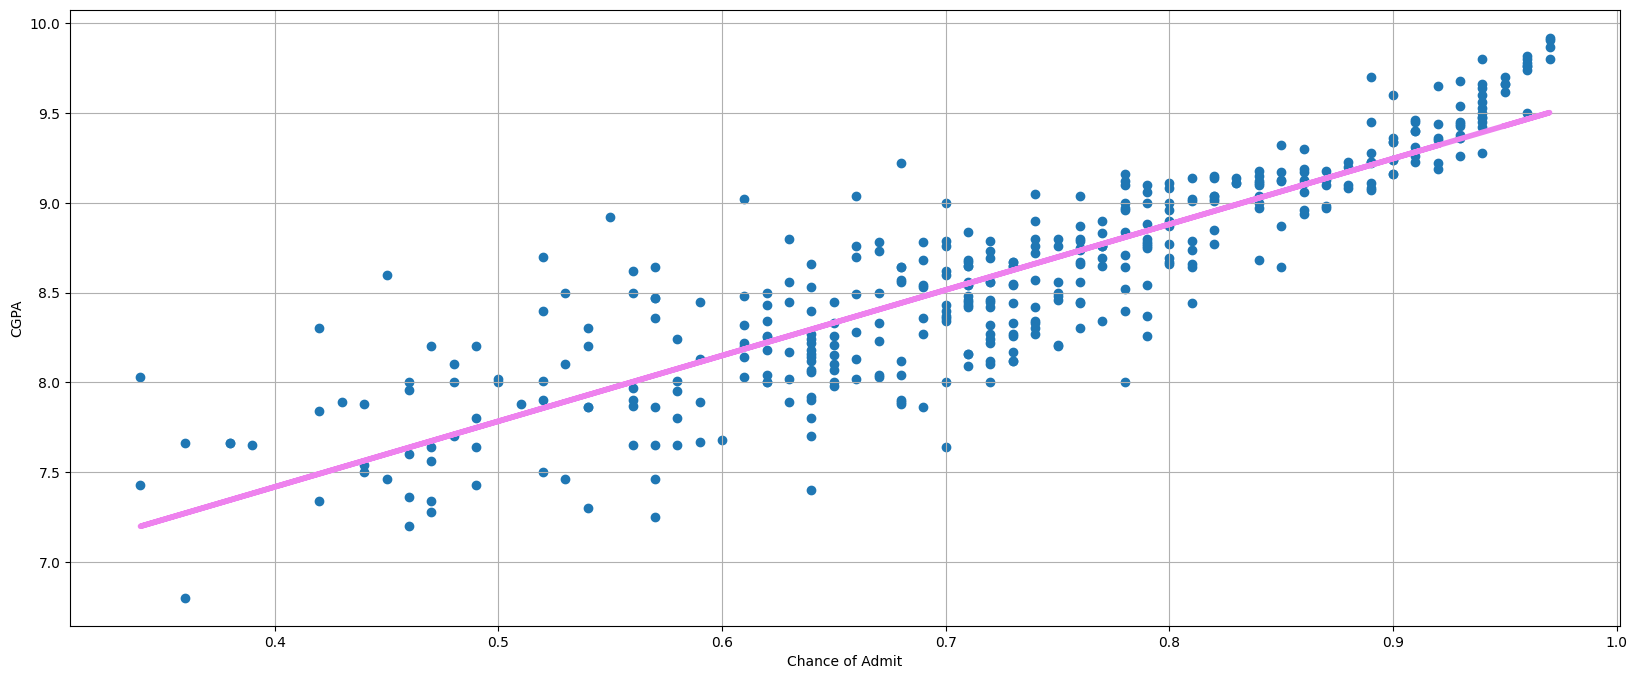

In [201]:

X = df.Chance_of_Admit.values.reshape(-1,1)[:1000]
y = df.CGPA.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LinearRegression()
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_ylabel('CGPA')
ax.set_xlabel('Chance of Admit')

line = model.intercept_ + X * model.coef_

ax.plot(X, line, 'violet', linewidth=4)
ax.scatter(X, y)
ax.grid()


**Note:**  In this exercise, we perform a data axis swap to predict CGPA based on the Chance of Admit. As a result, we obtain a distinct regression line that is not aligned the same way as the regression line in exercise 1; it has a different orientation.

**Note:** I was trying to make the mse smaller by adding more values to X and by changing the test size and the random seed. I should remind you that the Mean squared error was: 61.635491249999994 before the manipulations I did to decrease the error.

In [202]:

X = df[['TOEFL_Score', 'CGPA', 'SOP']].values.reshape(-1, 3)

y = df.Chance_of_Admit.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 0.0059741852611488325


**Note:** I also experimented by only adding more features to X, and I achieved success as the Mean Squared Error (MSE) significantly decreased.

In [203]:

X = df[['TOEFL_Score', 'CGPA', 'SOP', 'LOR', 'University_Rating']].values.reshape(-1, 5)

y = df.Chance_of_Admit.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 0.003956324338428716
